In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve
import datasets
import joblib
import os
from sklearn.base import clone
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv('/content/drive/MyDrive/Grammar_autocorrection_df1_new.csv')

In [47]:
df.head()

,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Tokenized Ungrammatical,Tokenized Standard,POS_Ungrammatical,POS_Standard,POS_W2V_Ungram,...,W2V_Ungram,W2V_Standard,Bigrams_Ungrammatical,Bigrams_Standard,Trigrams_Ungrammatical,Trigrams_Standard,W2V_Bigrams_Ungrammatical,W2V_Bigrams_Standard,W2V_Trigrams_Ungrammatical,W2V_Trigrams_Standard
0,verb tense errors,i goes to the store everyday,i go to the store everyday,29,27,"['i', 'goes', 'to', 'the', 'store', 'everyday']","['i', 'go', 'to', 'the', 'store', 'everyday']","[('i', 'NN'), ('goes', 'VBZ'), ('to', 'TO'), (...","[('i', 'NN'), ('go', 'VBP'), ('to', 'TO'), ('t...",[-0.08228746 -0.01981581 -0.0979661 -0.056605...,...,[-0.09451419 0.375208 0.14134021 0.045514...,[-0.09636861 0.39121816 0.14557602 0.048518...,"['i goes', 'goes to', 'to the', 'the store', '...","['i go', 'go to', 'to the', 'the store', 'stor...","['i goes to', 'goes to the', 'to the store', '...","['i go to', 'go to the', 'to the store', 'the ...",[-9.3448907e-03 1.0588918e-02 1.1424380e-02 ...,[-0.00572285 0.00105167 0.01174026 0.006799...,[ 1.2887640e-02 9.3754521e-04 3.3510681e-03 ...,[ 0.0102015 -0.00396408 0.01521751 0.001271...
1,verb tense errors,they was playing soccer last night,they were playing soccer last night,35,36,"['they', 'was', 'playing', 'soccer', 'last', '...","['they', 'were', 'playing', 'soccer', 'last', ...","[('they', 'PRP'), ('was', 'VBD'), ('playing', ...","[('they', 'PRP'), ('were', 'VBD'), ('playing',...",[-0.04535107 -0.11918545 -0.22042714 -0.078417...,...,[-0.13843012 0.41038266 0.17375773 0.044767...,[-0.12620597 0.41538048 0.17284322 0.053100...,"['they was', 'was playing', 'playing soccer', ...","['they were', 'were playing', 'playing soccer'...","['they was playing', 'was playing soccer', 'pl...","['they were playing', 'were playing soccer', '...",[ 3.33443144e-03 -1.64005870e-03 7.05454871e-...,[ 0.00249438 -0.00043362 -0.00242555 -0.003651...,[-0.00695896 -0.00924049 -0.00323533 0.001775...,[-0.01407359 -0.01196586 0.00043601 0.006041...
2,verb tense errors,she have completed her homework,she has completed her homework,32,31,"['she', 'have', 'completed', 'her', 'homework']","['she', 'has', 'completed', 'her', 'homework']","[('she', 'PRP'), ('have', 'VBP'), ('completed'...","[('she', 'PRP'), ('has', 'VBZ'), ('completed',...",[-0.1533973 -0.08662583 -0.18768367 -0.080586...,...,[-0.09026213 0.36275592 0.13942142 0.037402...,[-0.10659622 0.36198664 0.13967171 0.038143...,"['she have', 'have completed', 'completed her'...","['she has', 'has completed', 'completed her', ...","['she have completed', 'have completed her', '...","['she has completed', 'has completed her', 'co...",[-0.00254794 0.00283594 -0.00104337 -0.000946...,[-2.95928214e-03 -8.91483855e-03 -2.24487623e-...,[-0.00326878 -0.00051584 0.00208438 0.003810...,[-1.0017604e-02 4.5287423e-04 7.4835372e-04 ...
3,verb tense errors,he do not know the answer,he does not know the answer,25,27,"['he', 'do', 'not', 'know', 'the', 'answer']","['he', 'does', 'not', 'know', 'the', 'answer']","[('he', 'PRP'), ('do', 'VBZ'), ('not', 'RB'), ...","[('he', 'PRP'), ('does', 'VBZ'), ('not', 'RB')...",[-0.22198355 0.00536374 -0.28633088 -0.148984...,...,[-0.11189894 0.43371806 0.17557414 0.044784...,[-1.08334482e-01 4.10062581e-01 1.64677814e-...,"['he do', 'do not', 'not know', 'know the', 't...","['he does', 'does not', 'not know', 'know the'...","['he do not', 'do not know', 'not know the', '...","['he does not', 'does not know', 'not know the...",[ 0.00626314 0.00465646 -0.01552762 -0.015690...,[ 0.00418568 -0.00352466 -0.02067462 -0.010775...,[ 0.00438272 -0.00547448 -0.00940208 0.003644...,[-1.0895182e-03 -1.1162972e-04 4.0499968e-03 ...
4,verb tense errors,the sun rise in the east,the sun rises in the east,25,26,"['the', 'sun', 'rise', 'in', 'the', 'east']","['the', 'sun', 'rises', 'in', 'the', 'east']","[('the', 'DT'), ('sun', 'NN'), ('rise', 'NN'),...","[('the', 'DT'), ('sun', 'NN'), ('ri

In [48]:
# printing dataset columns
print(df.columns)

Index(['Error Type', 'Ungrammatical Statement', 'Standard English',
       'Ungrammatical Length', 'Standard Length', 'Tokenized Ungrammatical',
       'Tokenized Standard', 'POS_Ungrammatical', 'POS_Standard',
       'POS_W2V_Ungram', 'POS_W2V_Standard', 'POS_seq_U', 'POS_seq_S',
       'W2V_Ungram', 'W2V_Standard', 'Bigrams_Ungrammatical',
       'Bigrams_Standard', 'Trigrams_Ungrammatical', 'Trigrams_Standard',
       'W2V_Bigrams_Ungrammatical', 'W2V_Bigrams_Standard',
       'W2V_Trigrams_Ungrammatical', 'W2V_Trigrams_Standard'],
      dtype='object')


# Naive Bayes

In [49]:
embedding_experiments = {
    'POS':     ('POS_W2V_Ungram',             'POS_W2V_Standard'),
    'Unigram': ('W2V_Ungram',                 'W2V_Standard'),
    'Bigram':  ('W2V_Bigrams_Ungrammatical',  'W2V_Bigrams_Standard'),
    'Trigram': ('W2V_Trigrams_Ungrammatical', 'W2V_Trigrams_Standard')
}

In [50]:
# Ensure save directory exists
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Define & apply parser once
def parse_embedding(s):
    if isinstance(s, str):
        return np.array([float(x) for x in s.strip('[]').split()], dtype=float)
    return np.zeros(0, dtype=float)

for ug_col, st_col in embedding_experiments.values():
    df[ug_col] = df[ug_col].apply(parse_embedding)
    df[st_col] = df[st_col].apply(parse_embedding)

# Helper to stack feature arrays
def stack_feats(X):
    return np.vstack(X['feat'])

# Pipeline builder for Naive Bayes
def make_embedding_pipeline_nb(ug_col, st_col):
    n = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y     = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct
    X_df  = pd.DataFrame({'feat': feats})

    stacker = FunctionTransformer(stack_feats, validate=False)
    pipe    = Pipeline([
        ('stack', stacker),
        ('clf',   GaussianNB() )
    ])
    return pipe, X_df, y

# Train/Test split evaluation (90/10) & save models
print("=== Train/Test split 90/10 with Naive Bayes ===")
trained_pipelines = {}

for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_nb(ug, st)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y,
        test_size=0.1,
        stratify=y,
        random_state=42
    )

    # Train & evaluate
    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    trained_pipelines[name] = pipe

    # Print metrics
    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save trained pipeline
    model_path = os.path.join(save_dir, f"{name}_nb_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved model to {model_path}")


=== Train/Test split 90/10 with Naive Bayes ===

POS accuracy: 0.5470
              precision    recall  f1-score   support

           0     0.5569    0.4604    0.5041       202
           1     0.5401    0.6337    0.5831       202

    accuracy                         0.5470       404
   macro avg     0.5485    0.5470    0.5436       404
weighted avg     0.5485    0.5470    0.5436       404

Saved model to saved_models/POS_nb_pipeline.pkl

Unigram accuracy: 0.5149
              precision    recall  f1-score   support

           0     0.5124    0.6139    0.5586       202
           1     0.5185    0.4158    0.4615       202

    accuracy                         0.5149       404
   macro avg     0.5155    0.5149    0.5100       404
weighted avg     0.5155    0.5149    0.5100       404

Saved model to saved_models/Unigram_nb_pipeline.pkl

Bigram accuracy: 0.5248
              precision    recall  f1-score   support

           0     0.5187    0.6881    0.5915       202
           1    


=== Visualization for POS ===


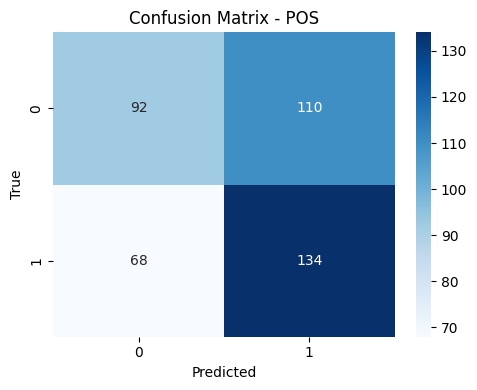

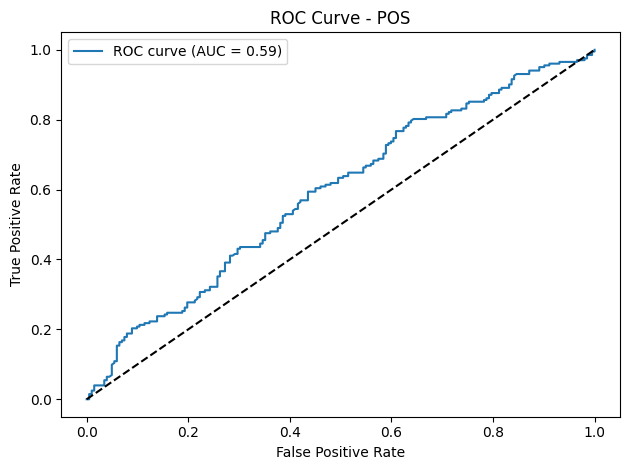

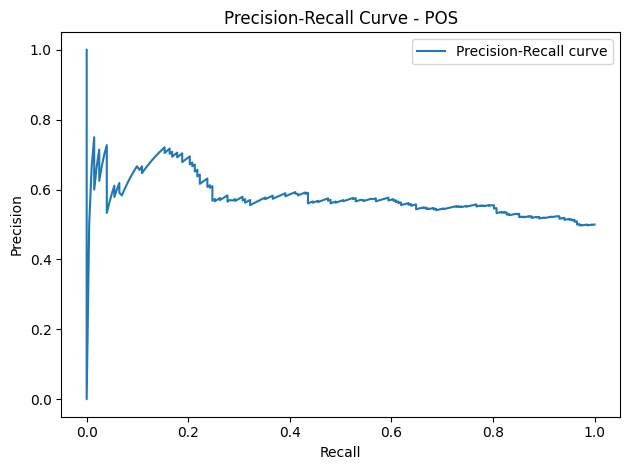


=== Visualization for Unigram ===


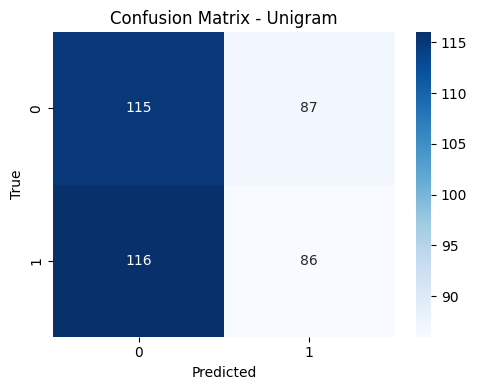

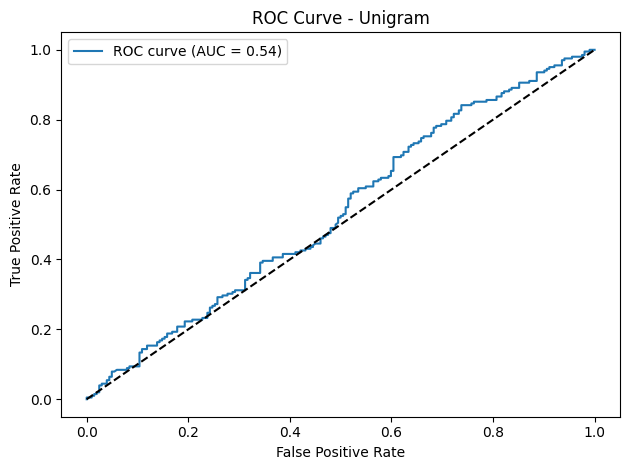

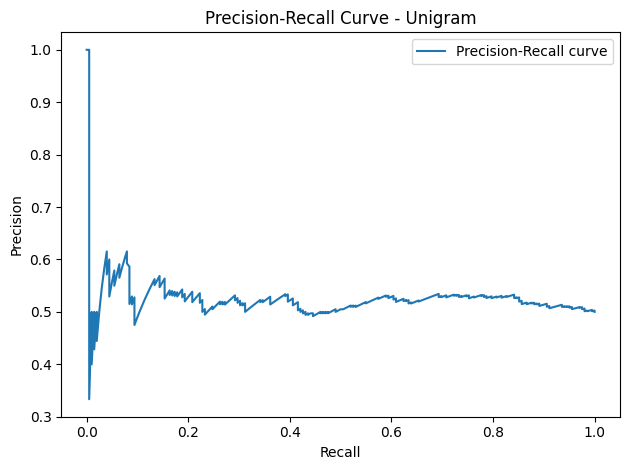


=== Visualization for Bigram ===


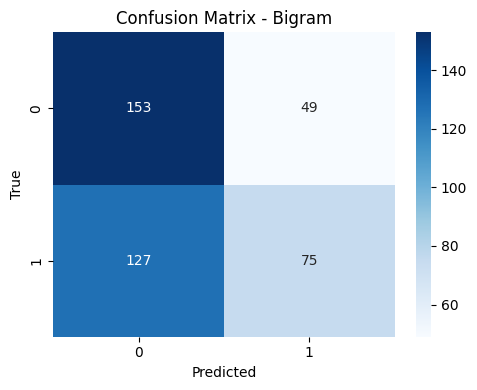

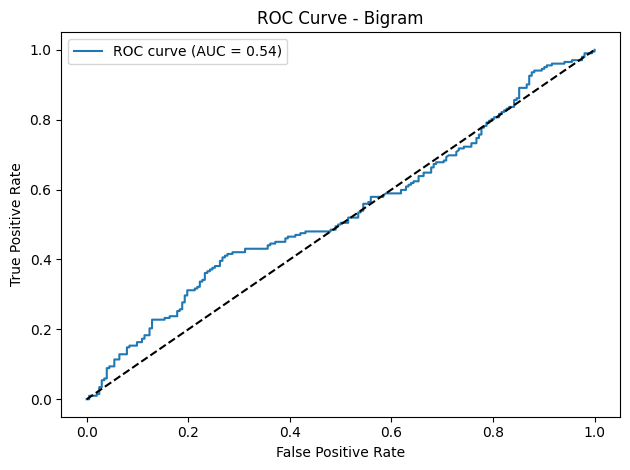

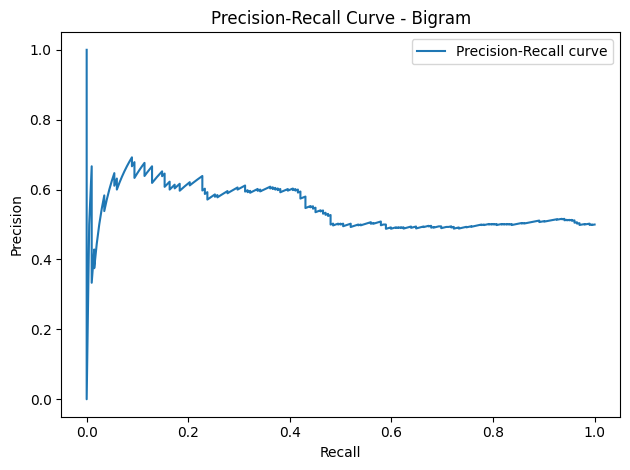


=== Visualization for Trigram ===


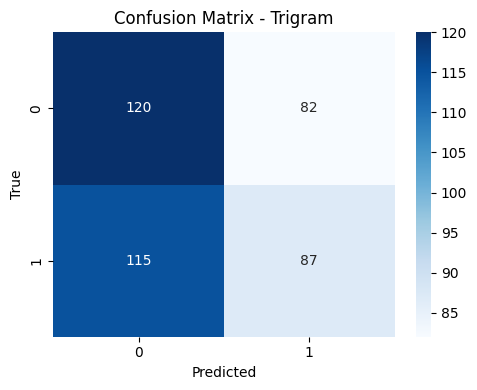

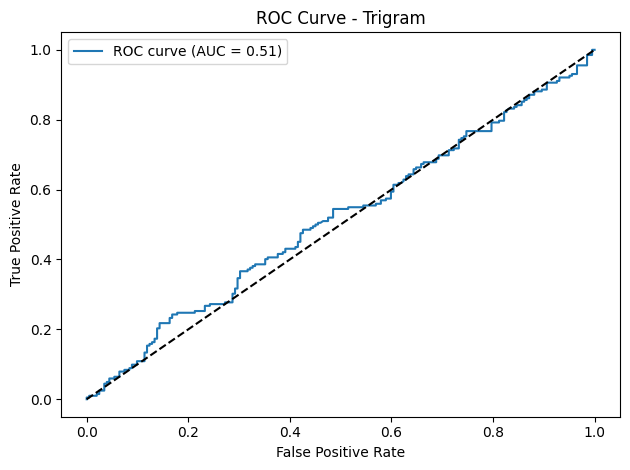

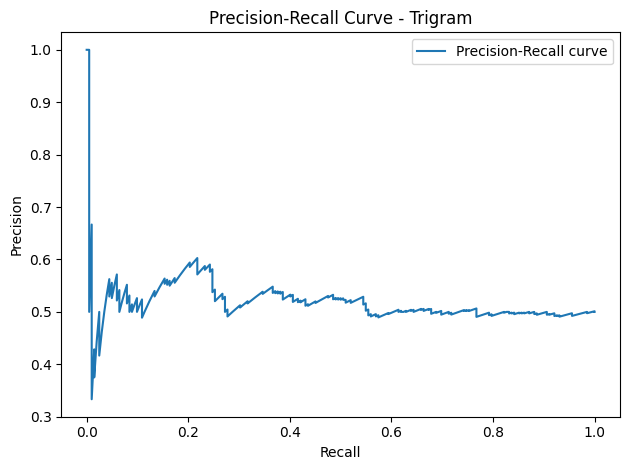

In [69]:
# Define the embedding types you want to visualize
embedding_types = ['POS', 'Unigram', 'Bigram', 'Trigram']

# Load models and visualize
for name in embedding_types:
    print(f"\n=== Visualization for {name} ===")

    # Load the model
    model_path = os.path.join(save_dir, f"{name}_CV_nb_pipeline.pkl")
    pipe = joblib.load(model_path)

    # Rebuild data
    ug_col, st_col = embedding_experiments[name]
    pipe_, X_df, y = make_embedding_pipeline_nb(ug_col, st_col)

    # Use 10% of data for visualization as test set
    _, X_te, _, y_te = train_test_split(X_df, y, test_size=0.1, stratify=y, random_state=42)
    preds = pipe.predict(X_te)
    probs = pipe.predict_proba(X_te)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_te, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_confusion_matrix.png"))
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_te, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_roc_curve.png"))
    plt.show()

    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_precision_recall_curve.png"))
    plt.show()

In [52]:
# Save directory
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

print("\n=== 10-Fold Cross Validation with Naive Bayes ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# To store ROC plotting data
roc_data = {}

for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_nb(ug, st)
    accs, precs, recs, f1s = [], [], [], []
    all_y_true = []
    all_y_probs = []

    for train_idx, test_idx in cv.split(X_df, y):
        p = clone(pipe)
        X_train, X_test = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        p.fit(X_train, y_train)
        preds = p.predict(X_test)
        probs = p.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, preds))
        precs.append(precision_score(y_test, preds))
        recs.append(recall_score(y_test, preds))
        f1s.append(f1_score(y_test, preds))

        all_y_true.extend(y_test)
        all_y_probs.extend(probs)

    # Store for separate plotting
    roc_data[name] = (all_y_true, all_y_probs)

    # Print metrics
    print(
        f"{name} - CV Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f} | "
        f"Precision: {np.mean(precs):.4f} ± {np.std(precs):.4f} | "
        f"Recall: {np.mean(recs):.4f} ± {np.std(recs):.4f} | "
        f"F1: {np.mean(f1s):.4f} ± {np.std(f1s):.4f}"
    )

    # Final training on full data
    pipe.fit(X_df, y)
    model_path = os.path.join(save_dir, f"{name}_CV_nb_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved final CV model to {model_path}")



=== 10-Fold Cross Validation with Naive Bayes ===
POS - CV Accuracy: 0.5213 ± 0.0172 | Precision: 0.5176 ± 0.0140 | Recall: 0.6298 ± 0.0221 | F1: 0.5681 ± 0.0158
Saved final CV model to saved_models/POS_CV_nb_pipeline.pkl
Unigram - CV Accuracy: 0.5107 ± 0.0272 | Precision: 0.5132 ± 0.0322 | Recall: 0.4544 ± 0.0398 | F1: 0.4810 ± 0.0296
Saved final CV model to saved_models/Unigram_CV_nb_pipeline.pkl
Bigram - CV Accuracy: 0.5012 ± 0.0171 | Precision: 0.5013 ± 0.0247 | Recall: 0.3380 ± 0.0522 | F1: 0.4018 ± 0.0429
Saved final CV model to saved_models/Bigram_CV_nb_pipeline.pkl
Trigram - CV Accuracy: 0.4988 ± 0.0207 | Precision: 0.4988 ± 0.0256 | Recall: 0.4024 ± 0.0354 | F1: 0.4447 ± 0.0277
Saved final CV model to saved_models/Trigram_CV_nb_pipeline.pkl


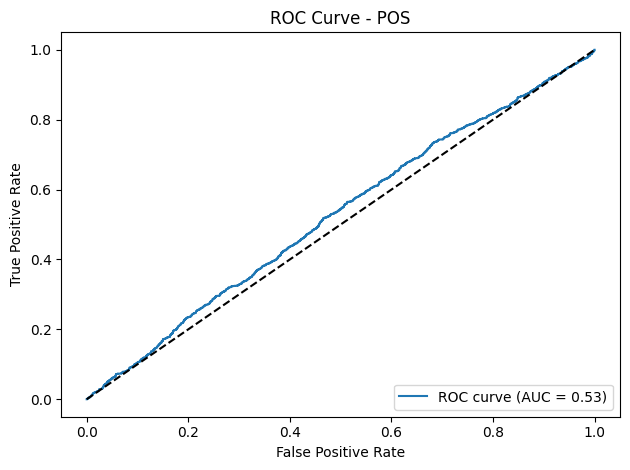

Saved ROC curve to saved_models/POS_CV_ROC_curve.png


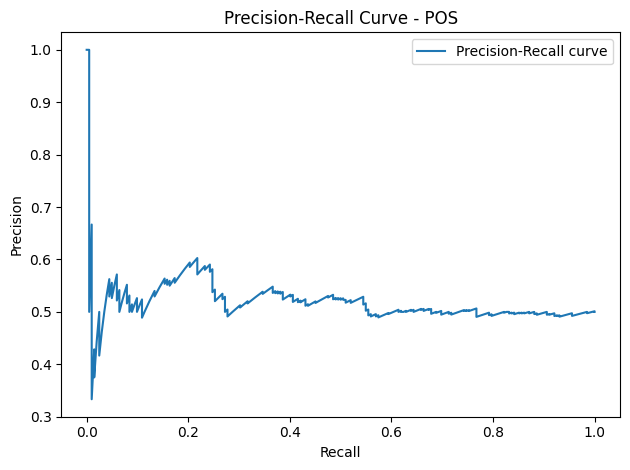

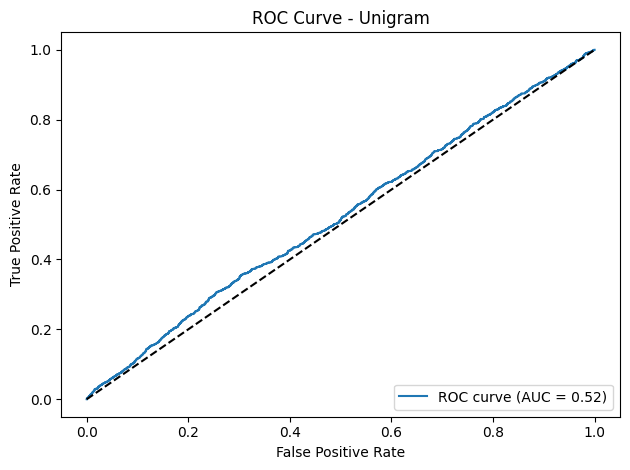

Saved ROC curve to saved_models/Unigram_CV_ROC_curve.png


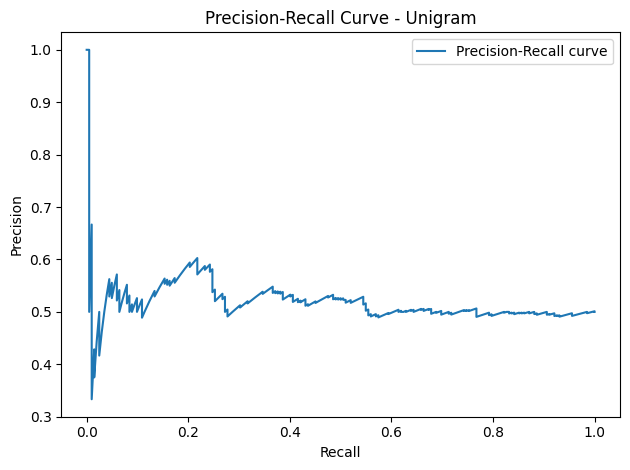

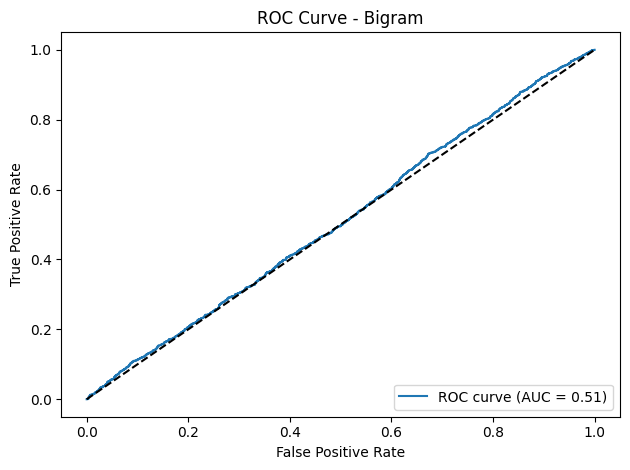

Saved ROC curve to saved_models/Bigram_CV_ROC_curve.png


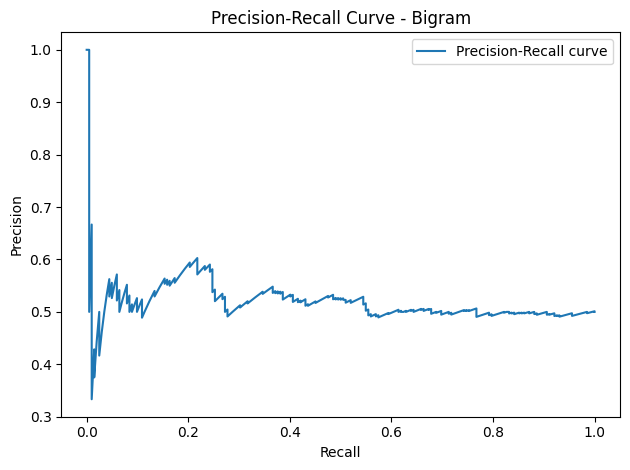

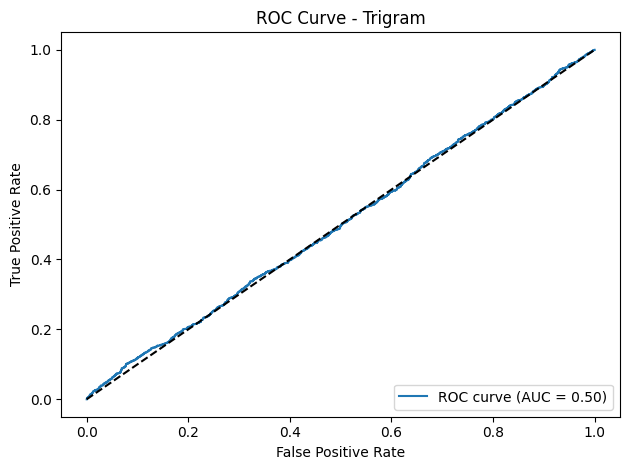

Saved ROC curve to saved_models/Trigram_CV_ROC_curve.png


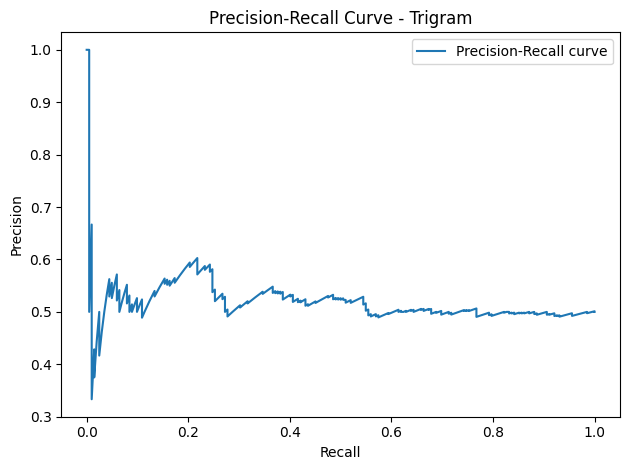

In [68]:
# Plot ROC for each embedding type
for name, (y_true, y_probs) in roc_data.items():
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()

    roc_path = os.path.join(save_dir, f"{name}_CV_ROC_curve.png")
    plt.savefig(roc_path)
    plt.show()
    print(f"Saved ROC curve to {roc_path}")

    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_precision_recall_curve.png"))
    plt.show()

In [54]:
# Directory where models are saved
save_dir = "saved_models"

# Reload all Naive Bayes models into a new dictionary
loaded_pipelines = {}

for name in embedding_experiments.keys():
    model_variants = {}

    # Load train/test split NB model
    path_train = os.path.join(save_dir, f"{name}_nb_pipeline.pkl")
    if os.path.exists(path_train):
        model_variants['train'] = joblib.load(path_train)
        print(f"Loaded trained NB model: {name}")

    # Load final CV NB model
    path_cv = os.path.join(save_dir, f"{name}_CV_nb_pipeline.pkl")
    if os.path.exists(path_cv):
        model_variants['cv'] = joblib.load(path_cv)
        print(f"Loaded CV NB model: {name}")

    if model_variants:
        loaded_pipelines[name] = model_variants


Loaded trained NB model: POS
Loaded CV NB model: POS
Loaded trained NB model: Unigram
Loaded CV NB model: Unigram
Loaded trained NB model: Bigram
Loaded CV NB model: Bigram
Loaded trained NB model: Trigram
Loaded CV NB model: Trigram


In [55]:
'''# Load saved Naive Bayes pipelines
save_dir = "saved_models"
model_names = ["POS", "Unigram", "Bigram", "Trigram"]

# Stub feature-extractor functions
def get_pos_features(sentence):
    return np.random.rand(50)

def get_unigram_features(sentence):
    return np.random.rand(100)

def get_bigram_features(sentence):
    return np.random.rand(50)

def get_trigram_features(sentence):
    return np.random.rand(50)

def extract_features_for_models(sentence):
    return {
        'POS':     get_pos_features(sentence),
        'Unigram': get_unigram_features(sentence),
        'Bigram':  get_bigram_features(sentence),
        'Trigram': get_trigram_features(sentence)
    }

# Prediction function
def predict_sentence(sentence, pipelines):
    feats = extract_features_for_models(sentence)
    print(f"\nInput sentence: {sentence}\n")
    for name, variants in pipelines.items():
        arr = pd.DataFrame({'feat': [feats[name]]})
        if 'train' in variants:
            pred = variants['train'].predict(arr)[0]
            prob = variants['train'].predict_proba(arr)[0][1]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} (train): {label} (confidence: {prob:.2f})")
        if 'cv' in variants:
            pred = variants['cv'].predict(arr)[0]
            prob = variants['cv'].predict_proba(arr)[0][1]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} (CV):    {label} (confidence: {prob:.2f})")

# Run interactive prompt
if __name__ == "__main__":
    sentence = input("Enter a sentence to check: ")
    predict_sentence(sentence, loaded_pipelines)'''

'# Load saved Naive Bayes pipelines \nsave_dir = "saved_models"\nmodel_names = ["POS", "Unigram", "Bigram", "Trigram"]\n\n# Stub feature-extractor functions  \ndef get_pos_features(sentence):\n    return np.random.rand(50)\n\ndef get_unigram_features(sentence):\n    return np.random.rand(100)\n\ndef get_bigram_features(sentence):\n    return np.random.rand(50)\n\ndef get_trigram_features(sentence):\n    return np.random.rand(50)\n\ndef extract_features_for_models(sentence):\n    return {\n        \'POS\':     get_pos_features(sentence),\n        \'Unigram\': get_unigram_features(sentence),\n        \'Bigram\':  get_bigram_features(sentence),\n        \'Trigram\': get_trigram_features(sentence)\n    }\n\n# Prediction function \ndef predict_sentence(sentence, pipelines):\n    feats = extract_features_for_models(sentence)\n    print(f"\nInput sentence: {sentence}\n")\n    for name, variants in pipelines.items():\n        arr = pd.DataFrame({\'feat\': [feats[name]]})\n        if \'train\' 

#SVM

In [56]:
'''from sklearn.svm import SVC

# Make directory to save models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

def stack_feats(X):
    return np.vstack(X['feat'])

def make_embedding_pipeline_svm(ug_col, st_col):
    n = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y     = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct
    X_df  = pd.DataFrame({'feat': feats})
    stacker = FunctionTransformer(stack_feats, validate=False)

    pipe = Pipeline([
        ('stack', stacker),
        ('scaler', StandardScaler()),
        ('clf',   SVC(kernel='linear',class_weight='balanced',probability=True))
    ])
    return pipe, X_df, y

trained_pipelines = {}
print("=== Train/Test split 90/10 with SVM ===")
for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_svm(ug, st)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y,
        test_size=0.1,
        stratify=y,
        random_state=42
    )
    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    trained_pipelines[name] = pipe

    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save model
    model_path = os.path.join(save_dir, f"{name}_svm_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved model to {model_path}")'''

'from sklearn.svm import SVC\n\n# Make directory to save models\nsave_dir = "saved_models"\nos.makedirs(save_dir, exist_ok=True)\n\ndef stack_feats(X):\n    return np.vstack(X[\'feat\'])\n\ndef make_embedding_pipeline_svm(ug_col, st_col):\n    n = len(df)\n    feats = list(df[ug_col]) + list(df[st_col])\n    y     = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct\n    X_df  = pd.DataFrame({\'feat\': feats})\n    stacker = FunctionTransformer(stack_feats, validate=False)\n\n    pipe = Pipeline([\n        (\'stack\', stacker),\n        (\'scaler\', StandardScaler()),\n        (\'clf\',   SVC(kernel=\'linear\',class_weight=\'balanced\',probability=True))\n    ])\n    return pipe, X_df, y\n\ntrained_pipelines = {}\nprint("=== Train/Test split 90/10 with SVM ===")\nfor name, (ug, st) in embedding_experiments.items():\n    pipe, X_df, y = make_embedding_pipeline_svm(ug, st)\n\n    X_tr, X_te, y_tr, y_te = train_test_split(\n        X_df, y,\n        test_size=0.1,\n        stratify=y,\

In [57]:
'''print("\n=== 10-Fold Cross Validation with SVM  ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}

for name, (ug, st) in embedding_experiments.items():
    # Prepare input features and labels
    pipe, X_df, y = make_embedding_pipeline_svm(ug, st)

    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    all_preds = []
    all_true = []
    fold_accuracies = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_df, y)):
        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        fold_model = Pipeline([
            ('stack', FunctionTransformer(stack_feats, validate=False)),
            ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
        ])
        fold_model.fit(X_train, y_train)
        preds = fold_model.predict(X_val)

        all_preds.extend(preds)
        all_true.extend(y_val)

        # Metrics per fold
        acc = accuracy_score(y_val, preds)
        prec = precision_score(y_val, preds, average='binary', zero_division=0)
        rec = recall_score(y_val, preds, average='binary', zero_division=0)
        f1 = f1_score(y_val, preds, average='binary', zero_division=0)

        fold_accuracies.append(acc)
        fold_precisions.append(prec)
        fold_recalls.append(rec)
        fold_f1s.append(f1)

    # Mean and Std for each metric
    mean_acc, std_acc = np.mean(fold_accuracies), np.std(fold_accuracies)
    mean_prec, std_prec = np.mean(fold_precisions), np.std(fold_precisions)
    mean_rec, std_rec = np.mean(fold_recalls), np.std(fold_recalls)
    mean_f1, std_f1 = np.mean(fold_f1s), np.std(fold_f1s)

    # Print summary in desired format
    print(f"{name} - CV Accuracy: {mean_acc:.4f} ± {std_acc:.4f} | "
          f"Precision: {mean_prec:.4f} ± {std_prec:.4f} | "
          f"Recall: {mean_rec:.4f} ± {std_rec:.4f} | "
          f"F1: {mean_f1:.4f} ± {std_f1:.4f}")

    # Save the final model trained on the entire dataset
    pipe.fit(X_df, y)
    model_path = os.path.join(save_dir, f"{name}_CV_svm_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved final CV model to {model_path}")'''

'print("\n=== 10-Fold Cross Validation with SVM  ===")\ncv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)\n\ncv_results = {}\n\nfor name, (ug, st) in embedding_experiments.items():\n    # Prepare input features and labels\n    pipe, X_df, y = make_embedding_pipeline_svm(ug, st)\n\n    fold_precisions = []\n    fold_recalls = []\n    fold_f1s = []\n    all_preds = []\n    all_true = []\n    fold_accuracies = []\n\n    for fold, (train_idx, val_idx) in enumerate(cv.split(X_df, y)):\n        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]\n        y_train, y_val = y[train_idx], y[val_idx]\n\n        fold_model = Pipeline([\n            (\'stack\', FunctionTransformer(stack_feats, validate=False)),\n            (\'clf\', SVC(kernel=\'linear\', class_weight=\'balanced\', probability=True))\n        ])\n        fold_model.fit(X_train, y_train)\n        preds = fold_model.predict(X_val)\n\n        all_preds.extend(preds)\n        all_true.extend(y_val)\n\n        # Me

In [58]:
'''# Reload all models into a new dictionary
loaded_pipelines = {}
for name in embedding_experiments.keys():
    model_variants = {}
    # Load train/test split model
    path_train = os.path.join(save_dir, f"{name}_svm_pipeline.pkl")
    if os.path.exists(path_train):
        model_variants['train'] = joblib.load(path_train)
        print(f"Loaded trained model: {name}")

    # Load final CV model
    path_cv = os.path.join(save_dir, f"{name}_CV_svm_pipeline.pkl")
    if os.path.exists(path_cv):
        model_variants['cv'] = joblib.load(path_cv)
        print(f"Loaded CV model: {name}")

    # Optional: use loaded_pipelines as default in your prediction functions
    loaded_pipelines[name] = model_variants
'''

'# Reload all models into a new dictionary\nloaded_pipelines = {}\nfor name in embedding_experiments.keys():\n    model_variants = {}\n    # Load train/test split model\n    path_train = os.path.join(save_dir, f"{name}_svm_pipeline.pkl")\n    if os.path.exists(path_train):\n        model_variants[\'train\'] = joblib.load(path_train)\n        print(f"Loaded trained model: {name}")\n\n    # Load final CV model\n    path_cv = os.path.join(save_dir, f"{name}_CV_svm_pipeline.pkl")\n    if os.path.exists(path_cv):\n        model_variants[\'cv\'] = joblib.load(path_cv)\n        print(f"Loaded CV model: {name}")\n\n    # Optional: use loaded_pipelines as default in your prediction functions\n    loaded_pipelines[name] = model_variants\n'

In [59]:
'''def get_pos_features(sentence):
    return np.random.rand(50)

def get_unigram_features(sentence):
    return np.random.rand(100)

def get_bigram_features(sentence):
    return np.random.rand(50)

def get_trigram_features(sentence):
    return np.random.rand(50)

def extract_features_for_models(sentence):
    features = {}

    features['POS'] = get_pos_features(sentence)
    features['Unigram'] = get_unigram_features(sentence)
    features['Bigram'] = get_bigram_features(sentence)
    features['Trigram'] = get_trigram_features(sentence)

    return features

def predict_sentence(sentence, pipelines):
    feats_dict = extract_features_for_models(sentence)
    print(f"Input sentence: {sentence}\n")

    for model_name, model_variants in pipelines.items():
        X_test_df = pd.DataFrame({'feat': [feats_dict[model_name]]})

        # Predict using train/test model
        if 'train' in model_variants:
            pred = model_variants['train'].predict(X_test_df)[0]
            prob = model_variants['train'].predict_proba(X_test_df)[0][1]
            print(f"{model_name} (train): {'Correct' if pred == 1 else 'Incorrect'} (confidence: {prob:.2f})")

        # Predict using CV model
        if 'cv' in model_variants:
            pred = model_variants['cv'].predict(X_test_df)[0]
            prob = model_variants['cv'].predict_proba(X_test_df)[0][1]
            print(f"{model_name} (CV): {'Correct' if pred == 1 else 'Incorrect'} (confidence: {prob:.2f})")


# Example usage:
sentence = input("Enter a sentence to check: ")
predict_sentence(sentence, loaded_pipelines)
'''

'def get_pos_features(sentence):\n    return np.random.rand(50)\n\ndef get_unigram_features(sentence):\n    return np.random.rand(100)\n\ndef get_bigram_features(sentence):\n    return np.random.rand(50)\n\ndef get_trigram_features(sentence):\n    return np.random.rand(50)\n\ndef extract_features_for_models(sentence):\n    features = {}\n\n    features[\'POS\'] = get_pos_features(sentence)\n    features[\'Unigram\'] = get_unigram_features(sentence)\n    features[\'Bigram\'] = get_bigram_features(sentence)\n    features[\'Trigram\'] = get_trigram_features(sentence)\n\n    return features\n\ndef predict_sentence(sentence, pipelines):\n    feats_dict = extract_features_for_models(sentence)\n    print(f"Input sentence: {sentence}\n")\n\n    for model_name, model_variants in pipelines.items():\n        X_test_df = pd.DataFrame({\'feat\': [feats_dict[model_name]]})\n\n        # Predict using train/test model\n        if \'train\' in model_variants:\n            pred = model_variants[\'train\

# XGBoost

In [70]:
from xgboost import XGBClassifier

# Configuration
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# 0) Parse embeddings (handle both strings and arrays)
def parse_embedding(s):
    if isinstance(s, str):
        return np.array([float(x) for x in s.strip("[]").split()], dtype=float)
    elif isinstance(s, (list, np.ndarray)):
        return np.array(s, dtype=float)
    else:
        return np.zeros(0, dtype=float)

for ug_col, st_col in embedding_experiments.values():
    df[ug_col] = df[ug_col].apply(parse_embedding)
    df[st_col] = df[st_col].apply(parse_embedding)

# Helper to stack feature arrays
def stack_feats(X):
    return np.vstack(X["feat"])

# Pipeline builder for XGBoost
def make_embedding_pipeline_xgb(ug_col, st_col):
    n     = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y     = np.array([0]*n + [1]*n)
    X_df  = pd.DataFrame({"feat": feats})

    stacker = FunctionTransformer(stack_feats, validate=False)
    pipe    = Pipeline([
        ("stack", stacker),
        ("clf",   XGBClassifier(eval_metric="logloss", random_state=42))
    ])
    return pipe, X_df, y

# 2) 90/10 Train/Test Split
print("=== Train/Test split 90/10 with XGBoost ===")
for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_xgb(ug, st)
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y, test_size=0.1, stratify=y, random_state=42
    )

    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)

    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save the pipeline
    model_path = os.path.join(save_dir, f"{name}_xgb_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved XGBoost pipeline to {model_path}")


=== Train/Test split 90/10 with XGBoost ===

POS accuracy: 0.4876
              precision    recall  f1-score   support

           0     0.4885    0.5248    0.5060       202
           1     0.4866    0.4505    0.4679       202

    accuracy                         0.4876       404
   macro avg     0.4876    0.4876    0.4869       404
weighted avg     0.4876    0.4876    0.4869       404

Saved XGBoost pipeline to saved_models/POS_xgb_pipeline.pkl

Unigram accuracy: 0.4629
              precision    recall  f1-score   support

           0     0.4590    0.4158    0.4364       202
           1     0.4661    0.5099    0.4870       202

    accuracy                         0.4629       404
   macro avg     0.4625    0.4629    0.4617       404
weighted avg     0.4625    0.4629    0.4617       404

Saved XGBoost pipeline to saved_models/Unigram_xgb_pipeline.pkl

Bigram accuracy: 0.4307
              precision    recall  f1-score   support

           0     0.4346    0.4604    0.4471       


=== Visualizations for XGBoost Models ===

--- Visualization for POS (XGBoost) ---


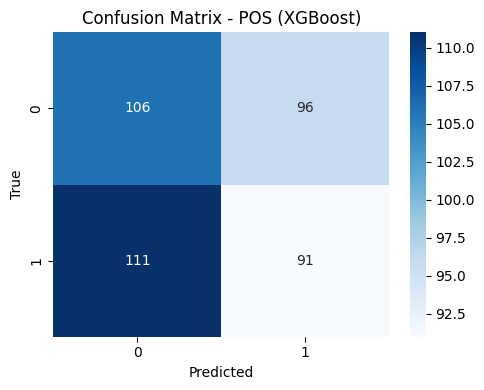

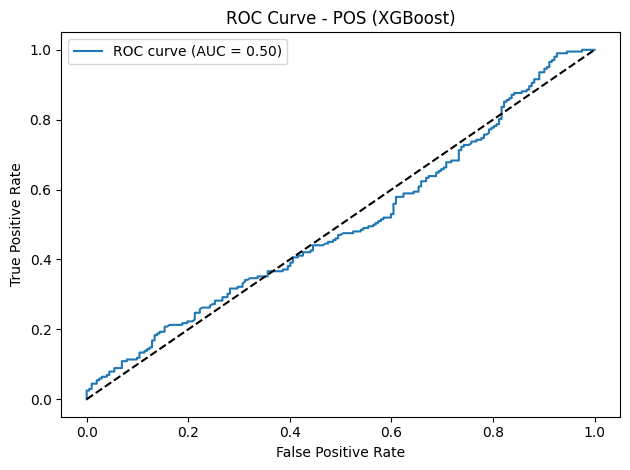

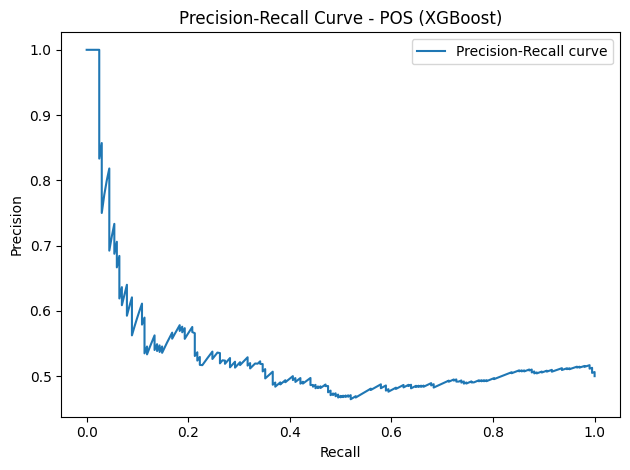


--- Visualization for Unigram (XGBoost) ---


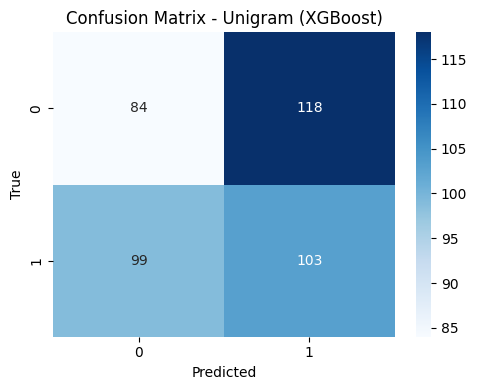

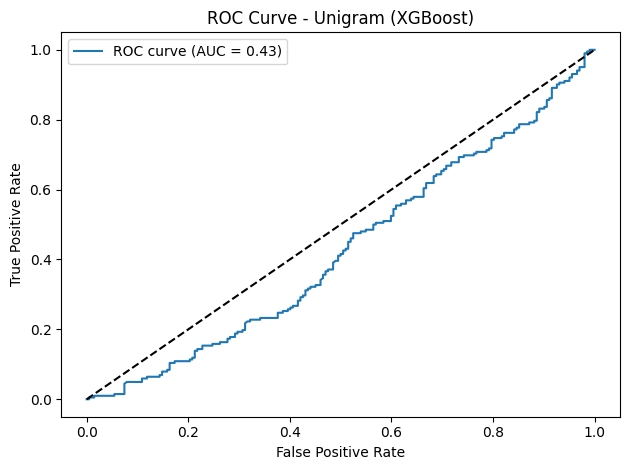

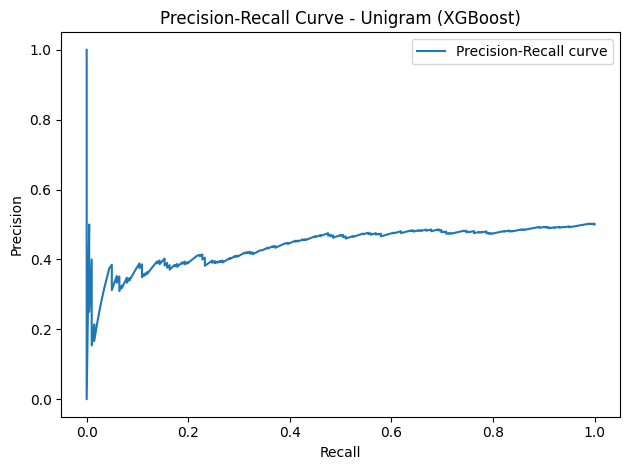


--- Visualization for Bigram (XGBoost) ---


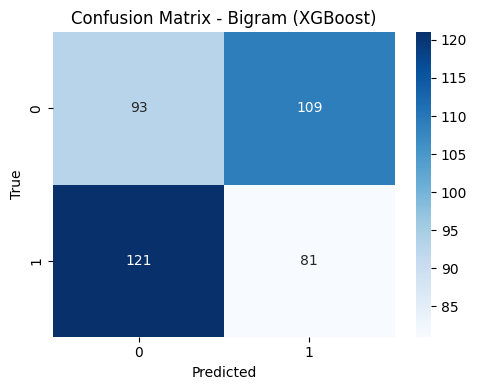

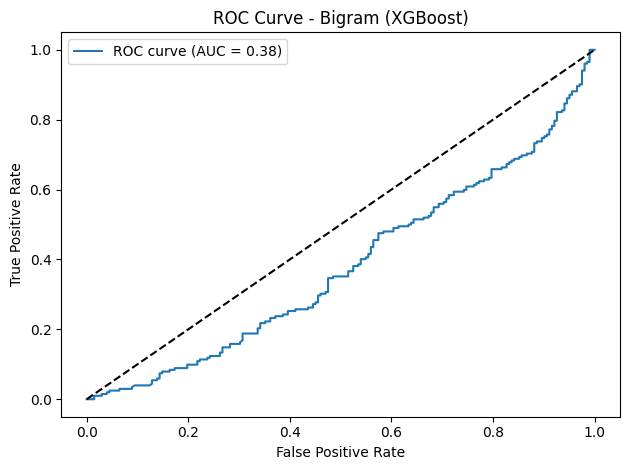

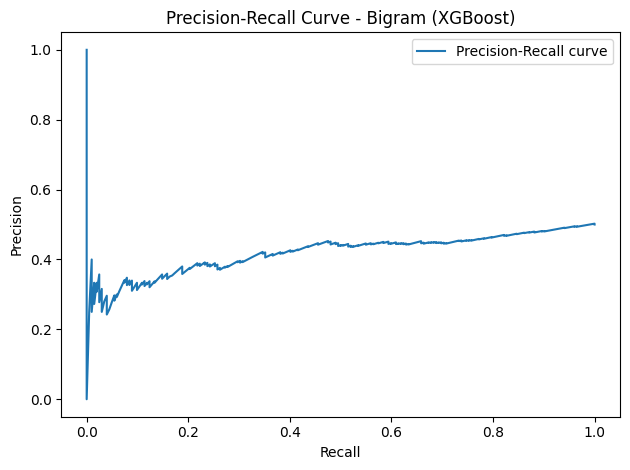


--- Visualization for Trigram (XGBoost) ---


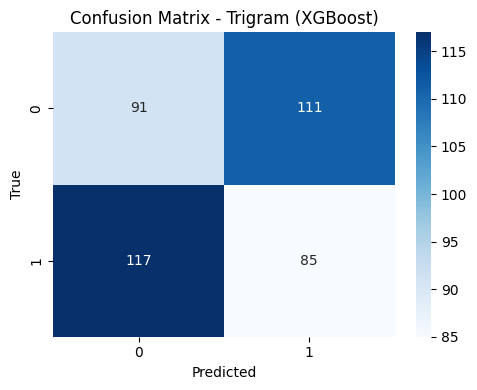

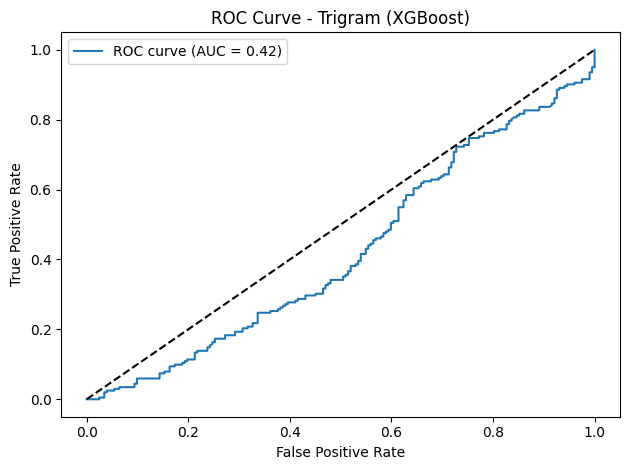

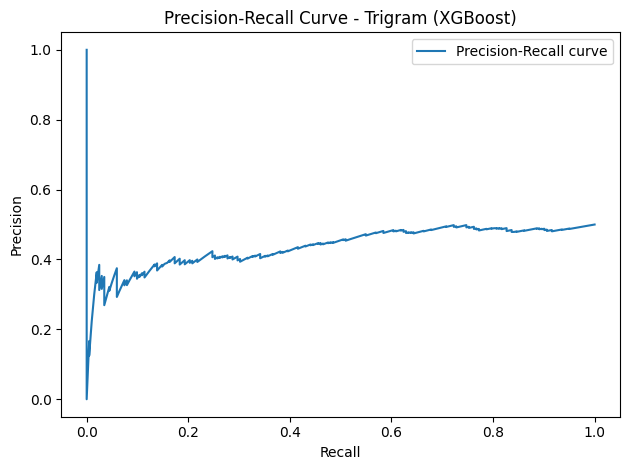

In [71]:
embedding_types = ['POS', 'Unigram', 'Bigram', 'Trigram']

print("\n=== Visualizations for XGBoost Models ===")

for name in embedding_types:
    print(f"\n--- Visualization for {name} (XGBoost) ---")

    # Load model
    model_path = os.path.join(save_dir, f"{name}_xgb_pipeline.pkl")
    pipe = joblib.load(model_path)

    # Rebuild data
    ug_col, st_col = embedding_experiments[name]
    pipe_, X_df, y = make_embedding_pipeline_xgb(ug_col, st_col)

    # 10% test split for visualizations
    _, X_te, _, y_te = train_test_split(X_df, y, test_size=0.1, stratify=y, random_state=42)
    preds = pipe.predict(X_te)
    probs = pipe.predict_proba(X_te)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_te, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (XGBoost)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_confusion_matrix.png"))
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_te, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name} (XGBoost)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_roc_curve.png"))
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name} (XGBoost)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_precision_recall_curve.png"))
    plt.show()

In [72]:
import os
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 10-fold stratified CV splitter
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    "clf__n_estimators":  [50, 100, 200],
    "clf__max_depth":     [3, 4, 5],
    "clf__learning_rate": [0.01, 0.05, 0.1]
}

print("\n=== 10-Fold Grid Search CV for XGBoost ===")
for name, (ug, st) in embedding_experiments.items():
    # rebuild the pipeline and data
    pipe, X_df, y = make_embedding_pipeline_xgb(ug, st)

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=cv_outer,
        scoring="accuracy",
        n_jobs=-1,
        verbose=2
    )
    grid.fit(X_df, y)

    # report
    print(f"\n{name} best params: {grid.best_params_}")
    print(f"{name} best CV accuracy: {grid.best_score_:.4f}")

    # save the tuned pipeline
    best_path = os.path.join(save_dir, f"{name}_xgb_grid_pipeline.pkl")
    joblib.dump(grid.best_estimator_, best_path)
    print(f"Saved best XGBoost pipeline to {best_path}")


=== 10-Fold Grid Search CV for XGBoost ===
Fitting 10 folds for each of 27 candidates, totalling 270 fits

POS best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 50}
POS best CV accuracy: 0.5414
Saved best XGBoost pipeline to saved_models/POS_xgb_grid_pipeline.pkl
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Unigram best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 4, 'clf__n_estimators': 50}
Unigram best CV accuracy: 0.5161
Saved best XGBoost pipeline to saved_models/Unigram_xgb_grid_pipeline.pkl
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Bigram best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__n_estimators': 50}
Bigram best CV accuracy: 0.4757
Saved best XGBoost pipeline to saved_models/Bigram_xgb_grid_pipeline.pkl
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Trigram best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}
Trigram be


=== Visualizations for Grid-Tuned XGBoost Models ===

--- Visualization for POS (XGBoost Grid Search) ---


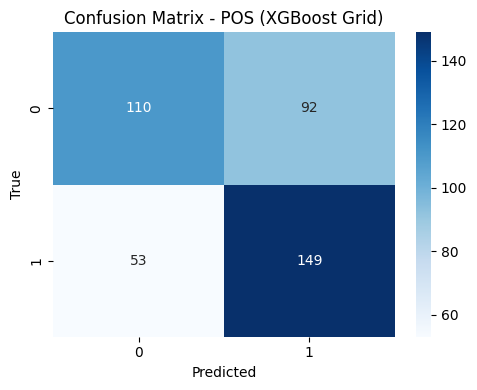

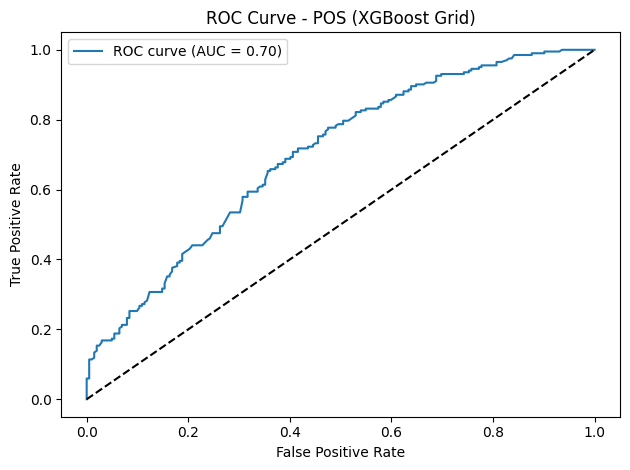

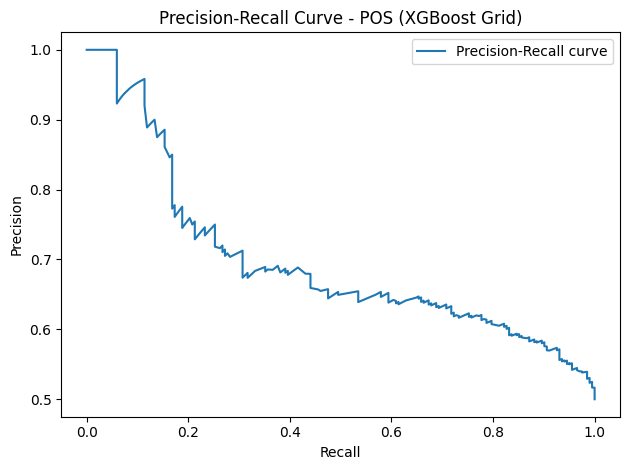


--- Visualization for Unigram (XGBoost Grid Search) ---


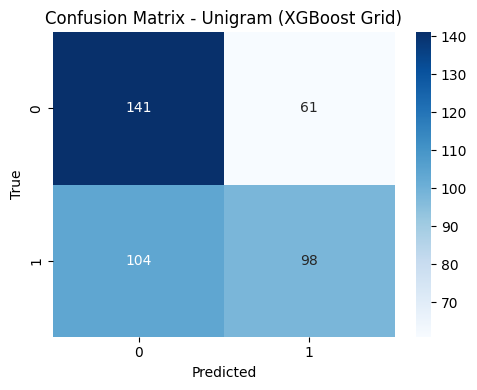

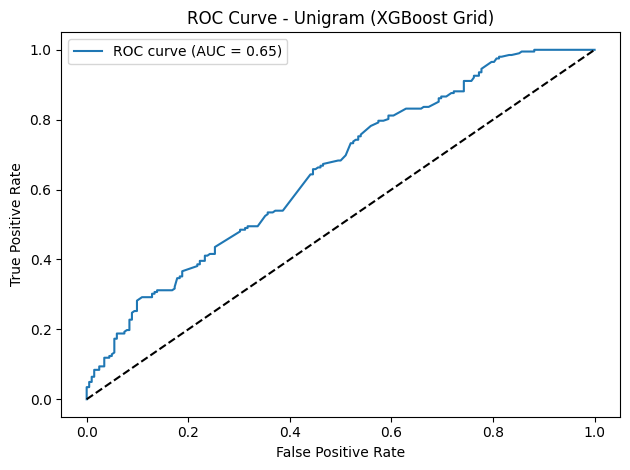

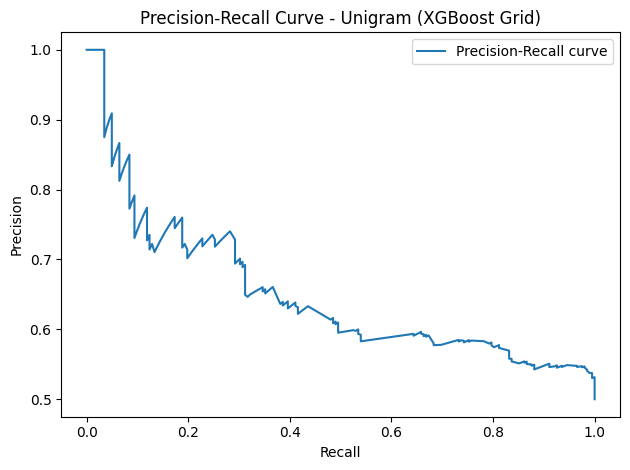


--- Visualization for Bigram (XGBoost Grid Search) ---


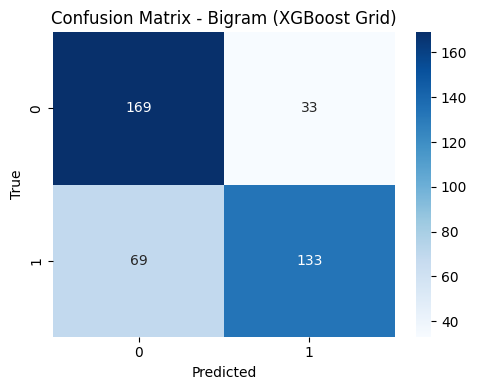

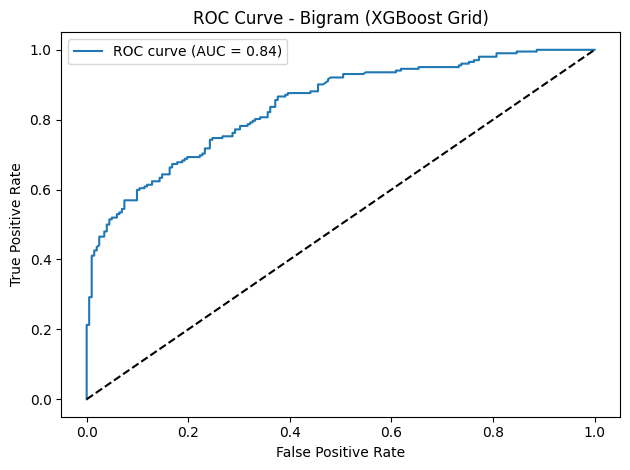

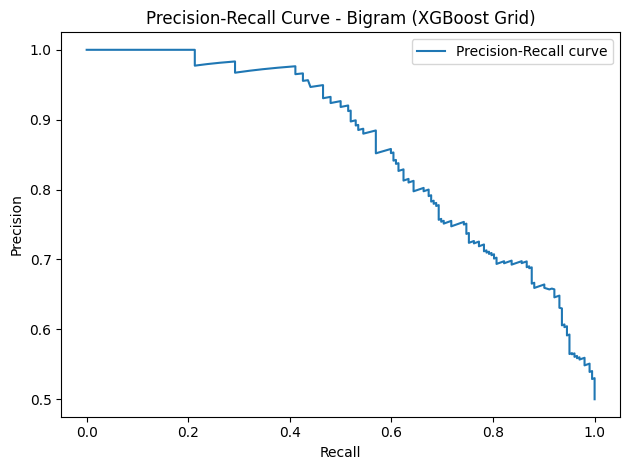


--- Visualization for Trigram (XGBoost Grid Search) ---


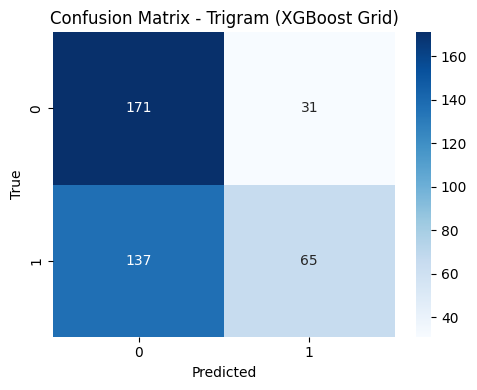

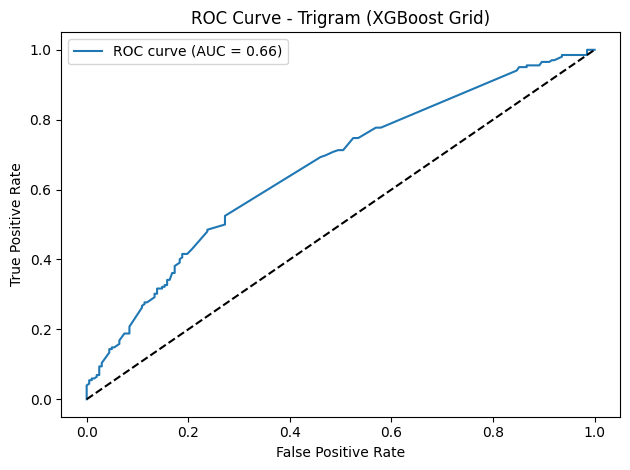

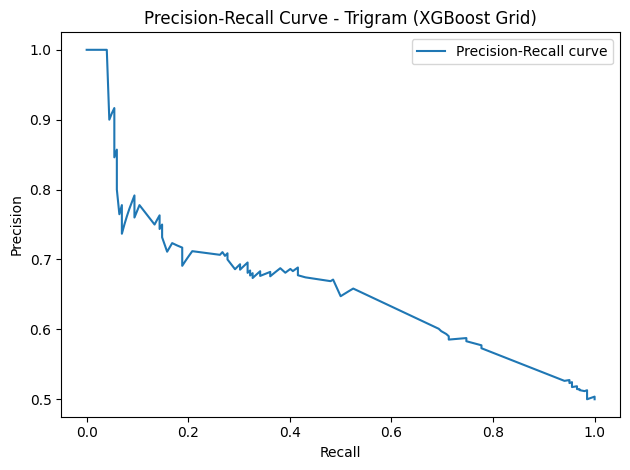

In [73]:
embedding_types = ['POS', 'Unigram', 'Bigram', 'Trigram']

print("\n=== Visualizations for Grid-Tuned XGBoost Models ===")

for name in embedding_types:
    print(f"\n--- Visualization for {name} (XGBoost Grid Search) ---")

    # Load the best model from grid search
    model_path = os.path.join(save_dir, f"{name}_xgb_grid_pipeline.pkl")
    pipe = joblib.load(model_path)

    # Rebuild the dataset
    ug_col, st_col = embedding_experiments[name]
    _, X_df, y = make_embedding_pipeline_xgb(ug_col, st_col)

    # Split 10% for visualization testing
    _, X_te, _, y_te = train_test_split(X_df, y, test_size=0.1, stratify=y, random_state=42)
    preds = pipe.predict(X_te)
    probs = pipe.predict_proba(X_te)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_te, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (XGBoost Grid)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_grid_confusion_matrix.png"))
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_te, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name} (XGBoost Grid)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_grid_roc_curve.png"))
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name} (XGBoost Grid)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_grid_precision_recall_curve.png"))
    plt.show()

In [62]:
'''# Reload saved XGBoost pipelines
save_dir = "saved_models"
loaded_xgb = {}
for name in embedding_experiments.keys():
    variants = {}
    p_train = os.path.join(save_dir, f"{name}_xgb_pipeline.pkl")
    p_grid  = os.path.join(save_dir, f"{name}_xgb_grid_pipeline.pkl")
    if os.path.exists(p_train):
        variants['train'] = joblib.load(p_train)
        print(f"Loaded XGB train model: {name}")
    if os.path.exists(p_grid):
        variants['grid']  = joblib.load(p_grid)
        print(f"Loaded XGB grid-model: {name}")
    if variants:
        loaded_xgb[name] = variants'''

'# Reload saved XGBoost pipelines \nsave_dir = "saved_models"\nloaded_xgb = {}\nfor name in embedding_experiments.keys():\n    variants = {}\n    p_train = os.path.join(save_dir, f"{name}_xgb_pipeline.pkl")\n    p_grid  = os.path.join(save_dir, f"{name}_xgb_grid_pipeline.pkl")\n    if os.path.exists(p_train):\n        variants[\'train\'] = joblib.load(p_train)\n        print(f"Loaded XGB train model: {name}")\n    if os.path.exists(p_grid):\n        variants[\'grid\']  = joblib.load(p_grid)\n        print(f"Loaded XGB grid-model: {name}")\n    if variants:\n        loaded_xgb[name] = variants'

In [63]:
'''# Stub feature-extractor functions
def get_pos_features(sentence):
    return np.random.rand(50)
def get_unigram_features(sentence):
    return np.random.rand(100)
def get_bigram_features(sentence):
    return np.random.rand(50)
def get_trigram_features(sentence):
    return np.random.rand(50)

def extract_features_for_models(sentence):
    return {
        'POS':     get_pos_features(sentence),
        'Unigram': get_unigram_features(sentence),
        'Bigram':  get_bigram_features(sentence),
        'Trigram': get_trigram_features(sentence)
    }

# Prediction function for XGB only
def predict_with_xgb(sentence, xgb_pipelines):
    feats = extract_features_for_models(sentence)
    print(f"\nInput sentence: {sentence}\n")
    for name, variants in xgb_pipelines.items():
        df_feat = pd.DataFrame({'feat': [feats[name]]})
        for tag, model in variants.items():
            pred = model.predict(df_feat)[0]
            prob = model.predict_proba(df_feat)[0][1]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} XGB ({tag}): {label} (confidence: {prob:.2f})")

# Test on an example
sentence = input("Enter a sentence to check:\n> ")
predict_with_xgb(sentence, loaded_xgb)'''

'# Stub feature-extractor functions \ndef get_pos_features(sentence):\n    return np.random.rand(50)\ndef get_unigram_features(sentence):\n    return np.random.rand(100)\ndef get_bigram_features(sentence):\n    return np.random.rand(50)\ndef get_trigram_features(sentence):\n    return np.random.rand(50)\n\ndef extract_features_for_models(sentence):\n    return {\n        \'POS\':     get_pos_features(sentence),\n        \'Unigram\': get_unigram_features(sentence),\n        \'Bigram\':  get_bigram_features(sentence),\n        \'Trigram\': get_trigram_features(sentence)\n    }\n\n# Prediction function for XGB only \ndef predict_with_xgb(sentence, xgb_pipelines):\n    feats = extract_features_for_models(sentence)\n    print(f"\nInput sentence: {sentence}\n")\n    for name, variants in xgb_pipelines.items():\n        df_feat = pd.DataFrame({\'feat\': [feats[name]]})\n        for tag, model in variants.items():\n            pred = model.predict(df_feat)[0]\n            prob = model.predict_